# QMMM workflow using LAMMPS and VOTCA-XTP

## What is this tutorial about
In this tutorial, we will learn how to set and perform excited state calculation using the Votca XTP library. We will use thiophene as our QM region.

## Requirements
* You will need to install **VOTCA** using the instructions described [here](https://github.com/votca/votca/blob/master/share/sphinx/INSTALL.rst)
* Once the installation is completed you need to activate the VOTCA enviroment by running the `VOTCARC.bash` script that has been installed at the bin subfolder for the path that you have provided for the installation step above

## Interacting with the XTP command line interface
The XTP package offers the following command line interface that the user can interact with:
* [xtp_map](https://www.votca.org/xtp/xtp_map.html)
* [xtp_parallel](https://www.votca.org/xtp/xtp_parallel.html)
* [xtp_run](https://www.votca.org/xtp/xtp_run.html)
* [xtp_tools](https://www.votca.org/xtp/xtp_tools.html)

Run the following command to view the help message of `xtp_tools`:

In [1]:
!xtp_tools -h

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_tools, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Runs excitation/charge transport tools



Allowed options:
  -h [ --help ]                 display this help and exit
  --verbose                     be loud and noisy
  --verbose1                    be very loud and noisy
  -v [ --verbose2 ]             be extremly loud and noisy
  -o [ --options ] arg          Tool user options.
  -t [ --nthreads ] arg (=1)    number of threads to create
  -e [ --execute ] arg        Name of Tool to run
  -l [ --list ]               Lists all available Tools
  -d [ --description ] arg    Short description of a Tools
  -c [ --cmdoptions ] arg     Modify options via command line by e.g. '-c 
                              xmltag.subtag=value'. Use whitespace to separate 
                              multiple o

### Note
> * In Jupyter the `!` symbol means: *run the following command as a standard unix command*
> * In Jupyter the command `%env` set an environmental variable

## Setting the environment


Remove previous hdf5 file

In [2]:
!rm -f state.hdf5

## Generate the topology from the Gromacs file
We will first generate the mapping from MD coordinates to segments, creating an [hdf5 file](https://www.hdfgroup.org/solutions/hdf5/) to store the results. You can explore the generated `state.hdf5` file with e.g. hdf5itebrowser. In Python, you can use the [h5py library](https://www.h5py.org/). The command to generate the mapping is the following,

In [3]:
!xtp_map -v -t MD_FILES/newfile.data -c MD_FILES/traj.dump -s system.xml -f state.hdf5 -i 99 > mapping.out

##  Check the mapping

Let us first output `.pdb` files for the segments, qmmolecules and classical segments in order to check the mapping. So we have to pass the calculator the filename. Votca has two ways to specify options for calculators. Using a file with the `-o` option or for quick things using the `-c` option on the command line, we will use both.

In the [mapchecker section of the manual](https://www.votca.org/xtp/mapchecker.html) you can find a table with the `mapchecker` input variables and their corresponding defaults. Finally, the following command run the check

In [4]:
!xtp_run -e mapchecker -c map_file=system.xml -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... mapchecker
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 


... mapchecker
 Using 1 threads
Writing segments to md_segments_step_10000.pdb
Writing qmmolecules to qm_segments_n_step_10000.pdb


Writing polarsegments to mp_segments_e_step_10000.pdb


Writing polarsegments to mp_segments_h_step_10000.pdb


Changes have not been written to state file.


## Neighborlist Calculation
The following step is to determine the neighbouring pairs for exciton transport.

We will use a cutoff of 1.5 nm. If you want to have a look at an option just the `-d` option with the calculator name

In [5]:
!xtp_run -d neighborlist

 neighborlist:  Determines neighbouring pairs for exciton transport
   OPTION      DEFAULT    UNIT           DESCRIPTION
   segmentpairs(OPTIONAL)                list of pairs of molecules for which to create pairs
    pair                                 Definition of one pair
     type      (REQUIRED)                names of two segmenttypes to create a pair
     cutoff    (REQUIRED) [nm]           cutoff value if the segmentname method is used
   constant    (1.5)      [nm]           contant cutoff for all segmenttypes
   exciton_cutoff(OPTIONAL)              cutoff for classical exciton transition charge treatment
Done - stopping here


In [6]:
!xtp_run -e neighborlist -c constant=1.5 -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... neighborlist
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 


... neighborlist
 Using 1 threads
Evaluating 1000 segments for neighborlist. 
 ... ... Evaluating 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
****

****

*****

******

*******

*********

****************



 ... ... Created 90067 direct pairs.Wrote MD topology (step = 10000, time = 0) to state.hdf5
... . 


## Read reorganization energies
In this step we will read the in site reorganization energies and store them in the `state.hdf5` file. We just need to copy the input file and execute the calculation.

In [7]:
!xtp_run -e einternal -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... einternal
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... einternal
 Using 1 threads
... ... Site, reorg. energies from system.xml.

... ... Read in site, reorg. energies for 1000 segments. 

Wrote MD topology (step = 10000, time = 0) to state.hdf5
... . 


## Compute site energy
In this step we will perform some *QMMM* calculations to compute the site energies. The `qmmm_mm.xml` file contains more options to perform the *MM* calculations.

In [8]:
!xtp_parallel -e qmmm -o qmmm_mm.xml -f state.hdf5 -j "write"

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... qmmm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... qmmm 
... ... Writing job file qmmm_mm_jobs.xml


... ... In total 3000 jobs
Changes have not been written to state file.


The previous command generates a `qmmm_mm_jobs.xml` containing 3000 *MM* jobs to compute, if you examine that file, it should look something like:
```xml
<jobs>
        <job>
                <id>0</id>
                <tag>thiophene_0:n</tag>
                <input>
                        <site_energies>0:n</site_energies>
                        <regions>
                                <region>
                                        <id>0</id>
                                        <segments>0:n</segments>
                                </region>
                        </regions>
                </input>
                <status>AVAILABLE</status>
        </job>
```

Let us run just the first 4 jobs by settings all jobs `status` to `COMPLETE` except for the first four. This can be easily done with [sed](https://www.gnu.org/software/sed/manual/sed.html) as follows,

In [9]:
!sed -i "s/AVAILABLE/COMPLETE/g" qmmm_mm_jobs.xml
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' qmmm_mm_jobs.xml
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' qmmm_mm_jobs.xml
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' qmmm_mm_jobs.xml
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' qmmm_mm_jobs.xml

Now we can run the jobs and save the results in the state file

In [10]:
!xtp_parallel -e qmmm -o qmmm_mm.xml -f state.hdf5 -j "run"
!xtp_parallel -e qmmm -o qmmm_mm.xml -f state.hdf5 -j "read"

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... qmmm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 


... qmmm 
MST ERR Job file = 'qmmm_mm_jobs.xml', cache size =  8
MST ERR Initialize jobs from qmmm_mm_jobs.xml


MST ERR Registered 3000 jobs.
T00 ERR ... Requesting next job


T00 ERR ... Assign jobs from stack


T00 ERR ... Next job: ID = 0=> [ 0%] 
T00 ERR ...  Regions created
T00 ERR ... Id: 0 type: polarregion size: 2 charge[e]= -2.77556e-16
T00 ERR ... Id: 1 type: staticregion size: 81 charge[e]= -1.78191e-14
T00 ERR ... 2025-1-20 6:23:10 Writing jobtopology to MMMM/frame_10000/job_0_thiophene_0:n/regions.pdb
T00 ERR ... 2025-1-20 6:23:10 Only 1 scf region is used. The remaining regions are static. So no inter regions scf is required. 
T00 ERR ... 2025-1-20 6:23:10 --Inter Region SCF Iteration 1 of 1
T00 ERR ... 2025-1-20 6:23:10 Evaluating polarregion 0
T00 ERR ... 2025-1-20 6:23:10 Evaluating interaction between polarregion 0 and staticregion 1
T00 ERR ... 2025-1-20 6:23:10 Starting Solving for classical polarization with 54 degrees of freedom.
T00 ERR ... 2025-1-20 6:23:10 CG: #iterations: 6, estimated error: 1.81713e-05
T00 ERR ...   Total static energy [hrt]= -0.004971088488
T00 ERR ...   Total polar energy [hrt]= -0.0007676658977
T00 ERR ...  Total energy [hrt]= -0.005738754386
T00 


T00 ERR ... Reporting job results

T00 ERR ... Requesting next job
T00 ERR ... Next job: ID = 1
T00 ERR ...  Regions created
T00 ERR ... Id: 0 type: polarregion size: 2 charge[e]= -1
T00 ERR ... Id: 1 type: staticregion size: 81 charge[e]= -1.781907955e-14
T00 ERR ... 2025-1-20 6:23:10 Writing jobtopology to MMMM/frame_10000/job_1_thiophene_0:e/regions.pdb
T00 ERR ... 2025-1-20 6:23:10 Only 1 scf region is used. The remaining regions are static. So no inter regions scf is required. 
T00 ERR ... 2025-1-20 6:23:10 --Inter Region SCF Iteration 1 of 1
T00 ERR ... 2025-1-20 6:23:10 Evaluating polarregion 0
T00 ERR ... 2025-1-20 6:23:10 Evaluating interaction between polarregion 0 and staticregion 1
T00 ERR ... 2025-1-20 6:23:10 Starting Solving for classical polarization with 54 degrees of freedom.
T00 ERR ... 2025-1-20 6:23:10 CG: #iterations: 7, estimated error: 2.932571714e-05
T00 ERR ...   Total static energy [hrt]= -0.003915405303
T00 ERR ...   Total polar energy [hrt]= -0.00626877981


T00 ERR ... Reporting job results

T00 ERR ... Requesting next job
T00 ERR ... Next job: ID = 3
T00 ERR ...  Regions created
T00 ERR ... Id: 0 type: polarregion size: 2 charge[e]= -2.775557562e-16
T00 ERR ... Id: 1 type: staticregion size: 77 charge[e]= -1.693090113e-14
T00 ERR ... 2025-1-20 6:23:10 Writing jobtopology to MMMM/frame_10000/job_3_thiophene_1:n/regions.pdb
T00 ERR ... 2025-1-20 6:23:10 Only 1 scf region is used. The remaining regions are static. So no inter regions scf is required. 
T00 ERR ... 2025-1-20 6:23:10 --Inter Region SCF Iteration 1 of 1
T00 ERR ... 2025-1-20 6:23:10 Evaluating polarregion 0
T00 ERR ... 2025-1-20 6:23:10 Evaluating interaction between polarregion 0 and staticregion 1
T00 ERR ... 2025-1-20 6:23:10 Starting Solving for classical polarization with 54 degrees of freedom.
T00 ERR ... 2025-1-20 6:23:10 CG: #iterations: 5, estimated error: 3.321625188e-05
T00 ERR ...   Total static energy [hrt]= -0.003424359186
T00 ERR ...   Total polar energy [hrt]= 


T00 ERR ... Assign jobs from stack


T00 ERR ... Sync did not yield any new jobs.
T00 ERR ... Next job: ID = - (none available)


MST ERR Assign jobs from stack


Changes have not been written to state file.


========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... qmmm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 


... qmmm 
Found 1 states of type e
Found 1 states of type h
Found 2 states of type n
2996 incomplete jobs found.



Wrote MD topology (step = 10000, time = 0) to state.hdf5
... . 


## Site energy and pair energy analysis
In this step we generate an histogram and compute the correlation function of site energies and pair energy differences.

In [11]:
!xtp_run -e eanalyze -f state.hdf5

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_run, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... eanalyze
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... eanalyze
 Using 1 threads
... ... Short-listed 1000 segments (pattern='*')
... ... ... NOTE Statistics of site energies and spatial correlations thereof are based on the short-listed segments only. 
... ... ...      Statistics of site-energy differences operate on the full list.
... ... excited state e


... ... excited state h


... ... excited state s


... ... excited state t


Changes have not been written to state file.


You should now see a set of files prefixed with `eanalyze` containing the histrogram and correlation functions.

In [12]:
!ls eanalyze*

eanalyze.pairhist_e.out  eanalyze.pairlist_s.out  eanalyze.sitehist_e.out
eanalyze.pairhist_h.out  eanalyze.pairlist_t.out  eanalyze.sitehist_h.out
eanalyze.pairhist_s.out  eanalyze.sitecorr_e.out  eanalyze.sitehist_s.out
eanalyze.pairhist_t.out  eanalyze.sitecorr_h.out  eanalyze.sitehist_t.out
eanalyze.pairlist_e.out  eanalyze.sitecorr_s.out
eanalyze.pairlist_h.out  eanalyze.sitecorr_t.out


## QM energy calculation
Our next task is to perform the qm calculations for each segment that we have stored in the hdf5 file. The calculations take place in 3 stages: write the jobs to a file, perform the computation and finally save the results to the state file. We created a small option file to make the calculation cheaper.

In [13]:
!cat eqm.xml

<?xml version="1.0"?>
<options>
  <eqm help="Executes qm calculations for individual molecules" section="sec:eqm">
    <map_file>system.xml</map_file>
    <gwbse>
      <gw>
        <mode>G0W0</mode>
      </gw>
      <ranges>full</ranges>
    </gwbse>
    <dftpackage>
      <basisset>3-21G</basisset>
      <auxbasisset>aux-def2-svp</auxbasisset>
    </dftpackage>
  </eqm>
</options>

For the sake of computational time let just compute the `gw` approximation and the `singlet`. You can also request the `triplet` or `all`,  see the [gwbse sectionfor the eqm calculator](https://www.votca.org/xtp/eqm.html).

First we will write the job in a file and enable only the first 2 jobs

In [14]:
!xtp_parallel -e eqm -o eqm.xml -f state.hdf5 -j "write"
!sed -i "s/AVAILABLE/COMPLETE/g" eqm.jobs
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' eqm.jobs
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' eqm.jobs

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... eqm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... eqm 
... ... Writing job file: eqm.jobs with 1000 jobs
Changes have not been written to state file.


Now, let run these 2 jobs

Here we used some more options. `-o` allows us to read in a file with options. `-j` changes the writing to running in this case. `-x` determines how many cores should be used for each job. We can also run multiple jobs in parallel using `-p`

In [15]:
!xtp_parallel -e eqm -o eqm.xml -f state.hdf5 -j run -x 4

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... eqm

... ... Initialized with 1 threads.

... ... Using 4 openmp threads for 1x4=4 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 


... eqm 
MST ERR Job file = 'eqm.jobs', cache size =  8
MST ERR Initialize jobs from eqm.jobs
MST ERR Registered 1000 jobs.
T00 ERR ... Requesting next job


T00 ERR ... Assign jobs from stack
T00 ERR ... Next job: ID = 0=> [ 0%] 
T00 ERR ... 2025-1-20 6:23:16 Evaluating site 0
T00 ERR ... Running DFT


T00 ERR ... Running GWBSE


T00 ERR ... Running ESPFIT
T00 ERR ... ===== Running on 4 threads ===== 


T00 ERR ... 2025-1-20 6:23:24 Calculated Densities at Numerical Grid, Number of electrons is 6.77704e-08
T00 ERR ... 2025-1-20 6:23:24 Calculating ESP at CHELPG grid points


T00 ERR ... 2025-1-20 6:23:27 Netcharge constrained to -0
T00 ERR ...  Sum of fitted charges: -9.85323e-16
T00 ERR ...  RMSE of fit:  0.00257031
T00 ERR ...  RRMSE of fit: 0.23994
T00 ERR ... El Dipole from fitted charges [e*bohr]:
		 dx = -0.6800 dy = +0.1553 dz = -0.2850 |d|^2 = +0.5678
T00 ERR ... El Dipole from exact qm density [e*bohr]:
		 dx = -0.7024 dy = +0.1605 dz = -0.2943 |d|^2 = +0.6057
T00 ERR ... Written charges to MP_FILES/frame_10000/n2s1/thiophene_0_n2s1.mps
T00 ERR ... 2025-1-20 6:23:27 Finished evaluating site 0
T00 ERR ... Saving data to molecule_0.orb
T00 ERR ... Reporting job results

T00 ERR ... Requesting next job
T00 ERR ... Next job: ID = 1
T00 ERR ... 2025-1-20 6:23:27 Evaluating site 1
T00 ERR ... Running DFT


T00 ERR ... Running GWBSE


T00 ERR ... Running ESPFIT
T00 ERR ... ===== Running on 4 threads ===== 


T00 ERR ... 2025-1-20 6:23:35 Calculated Densities at Numerical Grid, Number of electrons is -2.77407e-08
T00 ERR ... 2025-1-20 6:23:35 Calculating ESP at CHELPG grid points


T00 ERR ... 2025-1-20 6:23:38 Netcharge constrained to 0
T00 ERR ...  Sum of fitted charges: 7.56339e-16
T00 ERR ...  RMSE of fit:  0.00254811
T00 ERR ...  RRMSE of fit: 0.238125
T00 ERR ... El Dipole from fitted charges [e*bohr]:
		 dx = +0.1911 dy = +0.6925 dz = -0.2259 |d|^2 = +0.5670
T00 ERR ... El Dipole from exact qm density [e*bohr]:
		 dx = +0.1975 dy = +0.7157 dz = -0.2336 |d|^2 = +0.6057
T00 ERR ... Written charges to MP_FILES/frame_10000/n2s1/thiophene_1_n2s1.mps
T00 ERR ... 2025-1-20 6:23:38 Finished evaluating site 1
T00 ERR ... Saving data to molecule_1.orb
T00 ERR ... Reporting job results

T00 ERR ... Requesting next job


T00 ERR ... Assign jobs from stack
T00 ERR ... Sync did not yield any new jobs.
T00 ERR ... Next job: ID = - (none available)


MST ERR Assign jobs from stack
Changes have not been written to state file.


## QM calculation for pairs
In the following step we will run QM calculations for each pair in the hdf5 file. As the calculations on the previous step, we will first write the jobs in a file, then run them and finally store the results in the state file.

As in the previous section, we set the GWBSE mode to `G0W0`and the `ranges` to `full`, but we compute only the `gw` approximation. We do not need the BSE results for the coupling calculations. For more information, check the [iqm calculator options](https://www.votca.org/xtp/iqm.html). We also want to compute the `singlet` couplings. 

Before running the calculations, we need to specify in the `iqm` input which states to read into the jobfile for each segment type.

Now, let's write the jobs to the file

In [16]:
!xtp_parallel -e iqm -o iqm.xml -f state.hdf5 -s 0 -j "write"

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... iqm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... iqm 
... ... Writing job file iqm.jobs


... ... In total 90067 jobs
Changes have not been written to state file.


From the jobs that we just write down, let's make available only the first job

In [17]:
!sed -i "s/AVAILABLE/COMPLETE/g" iqm.jobs
!sed -i '0,/COMPLETE/s/COMPLETE/AVAILABLE/' iqm.jobs

Now we can run and store the jobs results

In [18]:
!xtp_parallel -e iqm -o iqm.xml -f state.hdf5 -s 0 -j run -q 1 -x 4

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... iqm

... ... Initialized with 1 threads.

... ... Using 4 openmp threads for 1x4=4 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... iqm 
MST ERR Job file = 'iqm.jobs', cache size =  1
MST ERR Initialize jobs from iqm.jobs


MST ERR Registered 90067 jobs.
T00 ERR ... Requesting next job


T00 ERR ... Assign jobs from stack


T00 ERR ... Next job: ID = 0=> [ 0%] 


T00 ERR ... 2025-1-20 6:23:47 Evaluating pair 0 [0:1] out of 90067
T00 ERR ... Running DFT


T00 ERR ... Calculating electronic couplings
T00 ERR ... Levels:Basis A[2:57] B[2:57]
T00 ERR ... Done with electronic couplings
T00 ERR ... Running GWBSE


T00 ERR ... Running BSECoupling


T00 ERR ... 2025-1-20 6:24:7 Finished evaluating pair 0:1
T00 ERR ... Orb file is not saved according to options 
T00 ERR ... Reporting job results

T00 ERR ... Requesting next job


T00 ERR ... Assign jobs from stack


T00 ERR ... Sync did not yield any new jobs.
T00 ERR ... Next job: ID = - (none available)


MST ERR Assign jobs from stack


Changes have not been written to state file.


Finally, we read the results into the state

In [19]:
!xtp_parallel -e iqm -o iqm.xml -f state.hdf5 -j "read"

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... iqm

... ... Initialized with 1 threads.

... ... Using 1 openmp threads for 1x1=1 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... iqm 


 ERROR    Pairs [total:updated(e,h,s,t)] 90067:(1,1,1,0) Incomplete jobs: 90066


Wrote MD topology (step = 10000, time = 0) to state.hdf5
... . 


## QMMM Calculations
We will run the *QMMM* calculations we will use the pregenerated `qmmm.jobs` file in the current work directory, so we can directly run the calculations. We also provide an option file in the `OPTIONFILES` folder. In qmmm calculations you can use the `jobfile` tag inside the optionfile to modify options from the jobfile. Here we modify the size of the staticregion.

In [20]:
!cat qmmm.xml

<?xml version="1.0"?>
<options>
  <qmmm help="Executes qmmm calculations for individual molecules and clusters" section="sec:qmmm">
    <print_regions_pdb help="print the geometry of the regions to a pdb file">true</print_regions_pdb>
    <max_iterations help="max iterations for qmmm scf loop">50</max_iterations>
    <map_file help="xml file with segment definition">system.xml</map_file>
    <job_file help="name of jobfile to which jobs are written">qmmm.jobs</job_file>
    <io_jobfile>
    <states>n s1 t1</states>
    </io_jobfile>
    <regions>
      <qmregion help="definition of a region">
        <id help="id of a region has to start from 0">0</id>
        <gwbse>
          <gw>
            <mode>G0W0</mode>
          </gw>
          <bse>
            <exctotal>100</exctotal>
          </bse>
          <ranges>full</ranges>
        </gwbse>
        <dftpackage>
          <basisset>3-21G</basisset>
          <auxbasisset>aux-def2-svp</auxbasisset>
        </dftpackage>
        <stat

In the jobfile we then provide the specific option

In [21]:
!cat qmmm.jobs

<jobs>
        <job>
                <id>0</id>
                <tag>vacuum</tag>
                <input>
                        <regions>
                                <staticregion>
                                        <id>1</id>
                                        <cutoff>
                                                <radius>0.0</radius>
                                        </cutoff>
                                </staticregion>
                        </regions>
                </input>
                <status>AVAILABLE</status>
        </job>
        <job>
                <id>1</id>
                <tag>static</tag>
                <input>
                        <regions>
                                <staticregion>
                                        <id>1</id>
                                        <cutoff>
                                                <radius>2.2</radius>
                                        </cutoff>
                             

In [22]:
!xtp_parallel -e qmmm -o qmmm.xml -f state.hdf5 -j run -x 4

========   VOTCA (http://www.votca.org)   ========

please read and cite: https://doi.org/10.21105/joss.06864
and submit bugs to https://github.com/votca/votca/issues

xtp_parallel, version 2024.2-dev gitid: 22618c7 (compiled Jan 20 2025, 06:19:32)

Initializing calculator
... qmmm

... ... Initialized with 1 threads.

... ... Using 4 openmp threads for 1x4=4 total threads.
1 frames in statefile, Ids are: 10000 
Starting at frame 10000
Evaluating frame 10000
Import MD Topology (i.e. frame 10000) from state.hdf5


.... 
... qmmm 
MST ERR Job file = 'qmmm.jobs', cache size =  8
MST ERR Initialize jobs from qmmm.jobs
MST ERR Registered 2 jobs.
T00 ERR ... Requesting next job
T00 ERR ... Assign jobs from stack
T00 ERR ... Next job: ID = 0=> [ 0%] 
T00 ERR ... Initial state: s1
T00 ERR ... Using overlap filter with threshold 0.8
T00 ERR ...  Regions created
T00 ERR ... Id: 0 type: qmregion size: 1 charge[e]= 0
T00 ERR ... Id: 1 type: staticregion size: 0 charge[e]= 0
T00 ERR ... 2025-1-20 6:24:17 Writing jobtopology to QMMM/frame_10000/job_0_vacuum/regions.pdb
T00 ERR ... 2025-1-20 6:24:17 Only 1 scf region is used. The remaining regions are static. So no inter regions scf is required. 
T00 ERR ... 2025-1-20 6:24:17 --Inter Region SCF Iteration 1 of 1
T00 ERR ... 2025-1-20 6:24:17 Evaluating qmregion 0
T00 ERR ... 2025-1-20 6:24:17 Evaluating interaction between qmregion 0 and staticregion 1
T00 ERR ... Running DFT calculation
T00 ERR ... 2025-1-20 6:24:17 Using 4 threads
T00 ERR ... 2025-1-20 6:24:


T00 ERR ... 2025-1-20 6:24:18 Setup invariant parts of Electron Repulsion integrals 


T00 ERR ... 2025-1-20 6:24:18 Constructed independent particle hamiltonian 
T00 ERR ... 2025-1-20 6:24:18 Nuclear Repulsion Energy is 206.268375
T00 ERR ... 2025-1-20 6:24:18 Using hybrid functional with alpha=0.25


T00 ERR ... 2025-1-20 6:24:18 Setup numerical integration grid medium for vxc functional XC_HYB_GGA_XC_PBEH
T00 ERR ... 2025-1-20 6:24:18 Setup Initial Guess using: atom
T00 ERR ... 2025-1-20 6:24:18 Calculating atom density for C


T00 ERR ... 2025-1-20 6:24:19 Calculating atom density for S


T00 ERR ... 2025-1-20 6:24:20 Calculating atom density for H


T00 ERR ... 2025-1-20 6:24:20 STARTING SCF cycle
T00 ERR ...  --------------------------------------------------------------------------
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:20 Iteration 1 of 100


T00 ERR ... 2025-1-20 6:24:20 Total Energy -550.081600252
T00 ERR ... 2025-1-20 6:24:20 DIIs error 0.200026975237
T00 ERR ... 2025-1-20 6:24:20 Delta Etot 0
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:20 Iteration 2 of 100


T00 ERR ... 2025-1-20 6:24:20 Total Energy -550.145805792
T00 ERR ... 2025-1-20 6:24:20 DIIs error 0.125909450063
T00 ERR ... 2025-1-20 6:24:20 Delta Etot -0.0642055404954
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:20 Iteration 3 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.17882103
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.0831559035581
T00 ERR ... 2025-1-20 6:24:21 Delta Etot -0.0330152381983
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 4 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.244109338
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.0176318536782
T00 ERR ... 2025-1-20 6:24:21 Delta Etot -0.065288308086
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 5 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.244947894
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.014988914191
T00 ERR ... 2025-1-20 6:24:21 Delta Etot -0.000838555586938
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 6 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.247082976
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.00309252747669
T00 ERR ... 2025-1-20 6:24:21 Delta Etot -0.0021350816844
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 7 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.246906584
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.00444659224018
T00 ERR ... 2025-1-20 6:24:21 Delta Etot 0.000176391449486
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 8 of 100


T00 ERR ... 2025-1-20 6:24:21 Total Energy -550.247215354
T00 ERR ... 2025-1-20 6:24:21 DIIs error 0.000901969581496
T00 ERR ... 2025-1-20 6:24:21 Delta Etot -0.000308769829758
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:21 Iteration 9 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224135
T00 ERR ... 2025-1-20 6:24:22 DIIs error 1.6635941192e-05
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -8.78082403233e-06
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:22 Iteration 10 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224137
T00 ERR ... 2025-1-20 6:24:22 DIIs error 7.44816654772e-06
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -2.13685780182e-09
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:22 Iteration 11 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224137
T00 ERR ... 2025-1-20 6:24:22 DIIs error 4.0997358831e-06
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -3.84943632525e-10
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:22 Iteration 12 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224138
T00 ERR ... 2025-1-20 6:24:22 DIIs error 3.57983847036e-07
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -1.76669345819e-10
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:22 Iteration 13 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224138
T00 ERR ... 2025-1-20 6:24:22 DIIs error 3.53011644651e-07
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -2.72848410532e-12
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:22 Iteration 14 of 100


T00 ERR ... 2025-1-20 6:24:22 Total Energy -550.247224138
T00 ERR ... 2025-1-20 6:24:22 DIIs error 1.91539323933e-08
T00 ERR ... 2025-1-20 6:24:22 Delta Etot -6.8212102633e-13
T00 ERR ... 2025-1-20 6:24:22 Total Energy has converged to -6.82121026e-13[Ha] after 14 iterations. DIIS error is converged up to 1.91539324e-08
T00 ERR ... 2025-1-20 6:24:22 Final Single Point Energy -550.247224138 Ha
T00 ERR ... 2025-1-20 6:24:22 Final Local Exc contribution -36.7123112404 Ha
T00 ERR ... 2025-1-20 6:24:22 Final Non Local Ex contribution -11.544596585 Ha
T00 ERR ...   Orbital energies: 
T00 ERR ...   index occupation energy(Hartree) 
T00 ERR ...      0      2   -88.9735977642
T00 ERR ...      1      2   -10.2048959032
T00 ERR ...      2      2   -10.2047819158
T00 ERR ...      3      2   -10.1828118659
T00 ERR ...      4      2   -10.1816644485
T00 ERR ...      5      2   -7.9933053822
T00 ERR ...      6      2   -5.9030083048
T00 ERR ...      7      2   -5.8981617420
T00 ERR ...      8      2

T00 ERR ... 2025-1-20 6:24:22 Electric Dipole is[e*bohr]:
		 dx=-0.198030594207
		 dy=0.0453257611005
		 dz=-0.083328902368
T00 ERR ... Writing result to temp.orb
T00 ERR ... 2025-1-20 6:24:22 DFT calculation took 5.04861195 seconds.
T00 ERR ... 2025-1-20 6:24:22 RPA level range [0:56]
T00 ERR ... 2025-1-20 6:24:22 GW  level range [0:56]
T00 ERR ... 2025-1-20 6:24:22 BSE level range occ[0:21]  virt[22:56]
T00 ERR ...  BSE type: full
T00 ERR ... 2025-1-20 6:24:22 BSE Hamiltonian has size 1540x1540
T00 ERR ...  BSE without Hqp offdiagonal elements
T00 ERR ...  Running GW as: G0W0
T00 ERR ...  qp_sc_limit [Hartree]: 1e-05
T00 ERR ...  Tasks: 
T00 ERR ...  GW 
T00 ERR ...  singlets 
T00 ERR ...  triplets 
T00 ERR ...  Store: 
T00 ERR ...  GW 
T00 ERR ...  Sigma integration: ppm
T00 ERR ...  eta: 0.001
T00 ERR ...  QP solver: grid
T00 ERR ...  QP grid steps: 1001
T00 ERR ...  QP grid spacing: 0.001
T00 ERR ... 2025-1-20 6:24:22 Using 4 threads
T00 ERR ... 2025-1-20 6:24:22 Using native Eige


T00 ERR ... 2025-1-20 6:24:23 Calculated Mmn_beta (3-center-repulsion x orbitals)  


T00 ERR ... 2025-1-20 6:24:23 Integrating Vxc with functional XC_HYB_GGA_XC_PBEH


T00 ERR ... 2025-1-20 6:24:23 Set hybrid exchange factor: 0.25
T00 ERR ... 2025-1-20 6:24:23 Calculated exchange-correlation expectation values 
T00 ERR ... 2025-1-20 6:24:23 Calculated Hartree exchange contribution
T00 ERR ... 2025-1-20 6:24:23 Scissor shifting DFT energies by: 0 Hrt


T00 ERR ... 2025-1-20 6:24:24 Not converged PQP states are:0
T00 ERR ... 2025-1-20 6:24:24 Increase the grid search interval
T00 ERR ...   ====== Perturbative quasiparticle energies (Hartree) ====== 
T00 ERR ...    DeltaHLGap = +0.166439 Hartree
T00 ERR ...   Level =    0 DFT = -88.9736 VXC = -4.8359 S-X = -7.2740 S-C = -9.1023 GWA = -100.5140
T00 ERR ...   Level =    1 DFT = -10.2049 VXC = -1.7037 S-X = -2.6702 S-C = +0.6565 GWA = -10.5149
T00 ERR ...   Level =    2 DFT = -10.2048 VXC = -1.7036 S-X = -2.6702 S-C = +0.6564 GWA = -10.5149
T00 ERR ...   Level =    3 DFT = -10.1828 VXC = -1.7034 S-X = -2.6695 S-C = +0.6382 GWA = -10.5107
T00 ERR ...   Level =    4 DFT = -10.1817 VXC = -1.7038 S-X = -2.6706 S-C = +0.6381 GWA = -10.5103
T00 ERR ...   Level =    5 DFT = -7.9933 VXC = -1.5790 S-X = -2.5124 S-C = +0.5079 GWA = -8.4188
T00 ERR ...   Level =    6 DFT = -5.9030 VXC = -1.5781 S-X = -2.1975 S-C = +0.4099 GWA = -6.1126
T00 ERR ...   Level =    7 DFT = -5.8982 VXC = -1.5795 S-X = -2


T00 ERR ... 2025-1-20 6:24:24 Calculated offdiagonal part of Sigma  
T00 ERR ... 2025-1-20 6:24:24 Full quasiparticle Hamiltonian  
T00 ERR ...   ====== Diagonalized quasiparticle energies (Hartree) ====== 
T00 ERR ...   Level =    0 PQP = -100.514041 DQP = -100.514070 
T00 ERR ...   Level =    1 PQP = -10.514945 DQP = -10.515280 
T00 ERR ...   Level =    2 PQP = -10.514929 DQP = -10.515210 
T00 ERR ...   Level =    3 PQP = -10.510681 DQP = -10.510992 
T00 ERR ...   Level =    4 PQP = -10.510350 DQP = -10.510512 
T00 ERR ...   Level =    5 PQP = -8.418801 DQP = -8.419129 
T00 ERR ...   Level =    6 PQP = -6.112596 DQP = -6.112612 
T00 ERR ...   Level =    7 PQP = -6.109560 DQP = -6.109557 
T00 ERR ...   Level =    8 PQP = -6.101341 DQP = -6.101344 
T00 ERR ...   Level =    9 PQP = -0.955636 DQP = -0.959526 
T00 ERR ...   Level =   10 PQP = -0.815632 DQP = -0.814391 
T00 ERR ...   Level =   11 PQP = -0.809301 DQP = -0.810797 
T00 ERR ...   Level =   12 PQP = -0.643711 DQP = -0.646762 



T00 ERR ... 2025-1-20 6:24:24 Setup Full triplet hamiltonian 
T00 ERR ... 2025-1-20 6:24:24 Davidson Solver using 4 threads.
T00 ERR ... 2025-1-20 6:24:24 Tolerance : 0.0001
T00 ERR ... 2025-1-20 6:24:24 DPR Correction
T00 ERR ... 2025-1-20 6:24:24 Matrix size : 1540x1540
T00 ERR ... 2025-1-20 6:24:24 iter	Search Space	Norm


T00 ERR ... 2025-1-20 6:24:24    0          200 	 7.58e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:25    1          310 	 1.05e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:26    2          420 	 7.07e-04 	 47.00% converged


T00 ERR ... 2025-1-20 6:24:27    3          479 	 5.76e-05 	 100.00% converged
T00 ERR ... 2025-1-20 6:24:27 Davidson converged after 3 iterations.
T00 ERR ... 2025-1-20 6:24:27-----------------------------------
T00 ERR ... 2025-1-20 6:24:27- Davidson ran for 3.207238439secs.
T00 ERR ... 2025-1-20 6:24:27-----------------------------------
T00 ERR ... 2025-1-20 6:24:27 Solved BSE for triplets 


T00 ERR ...   ====== triplet energies (eV) ====== 
T00 ERR ...   T =    1 Omega = +3.800521430793 eV  lamdba = +326.27 nm <FT> = +12.4571 <K_d> = -8.6566
T00 ERR ...            HOMO-0   -> LUMO+0    : 94.9%
T00 ERR ...    
T00 ERR ...   T =    2 Omega = +4.694966966163 eV  lamdba = +264.11 nm <FT> = +12.1025 <K_d> = -7.4075
T00 ERR ...            HOMO-1   -> LUMO+0    : 94.7%
T00 ERR ...    
T00 ERR ...   T =    3 Omega = +6.074096141479 eV  lamdba = +204.15 nm <FT> = +14.0290 <K_d> = -7.9549
T00 ERR ...            HOMO-0   -> LUMO+2    : 85.7%
T00 ERR ...    
T00 ERR ...   T =    4 Omega = +6.651175902913 eV  lamdba = +186.43 nm <FT> = +14.1721 <K_d> = -7.5209
T00 ERR ...            HOMO-1   -> LUMO+2    : 93.6%
T00 ERR ...    
T00 ERR ...   T =    5 Omega = +7.119113565311 eV  lamdba = +174.18 nm <FT> = +13.8290 <K_d> = -6.7099
T00 ERR ...            HOMO-0   -> LUMO+1    : 96.8%
T00 ERR ...    
T00 ERR ...   T =    6 Omega = +7.253659280749 eV  lamdba = +170.95 nm <FT> = +14.1595 <


T00 ERR ... 2025-1-20 6:24:27    0          200 	 2.30e-01 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:28    1          310 	 1.39e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:29    2          420 	 8.64e-04 	 48.00% converged


T00 ERR ... 2025-1-20 6:24:31    3          478 	 6.21e-05 	 100.00% converged
T00 ERR ... 2025-1-20 6:24:31 Davidson converged after 3 iterations.
T00 ERR ... 2025-1-20 6:24:31-----------------------------------
T00 ERR ... 2025-1-20 6:24:31- Davidson ran for 3.50425684secs.
T00 ERR ... 2025-1-20 6:24:31-----------------------------------
T00 ERR ... 2025-1-20 6:24:31 Solved BSE for singlets 


T00 ERR ...   ====== singlet energies (eV) ====== 
T00 ERR ...   S =    1 Omega = +6.263423650995 eV  lamdba = +197.97 nm <FT> = +12.4758 <K_x> = +0.6208 <K_d> = -6.8331
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = +0.7024 dy = -0.1605 dz = +0.2943 |d|^2 = +0.6057 f = +0.0929
T00 ERR ...            HOMO-1   -> LUMO+0    : 85.3%
T00 ERR ... 
T00 ERR ...   S =    2 Omega = +6.449245086197 eV  lamdba = +192.27 nm <FT> = +12.6394 <K_x> = +1.1567 <K_d> = -7.3469
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = -0.0030 dy = -0.7102 dz = -0.3802 |d|^2 = +0.6490 f = +0.1025
T00 ERR ...            HOMO-0   -> LUMO+0    : 95.1%
T00 ERR ... 
T00 ERR ...   S =    3 Omega = +7.590770427135 eV  lamdba = +163.36 nm <FT> = +13.7769 <K_x> = +0.3285 <K_d> = -6.5146
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = +0.0036 dy = +0.0062 dz = -0.0118 |d|^2 = +0.0002 f = +0.0000
T00 ERR ...            HOMO-0   -> LUMO+1    : 96.8%
T00 ERR ... 
T00 ERR ...   S =    4 Omega =


T00 ERR ... Next State is: s1
T00 ERR ... Reporting job results

T00 ERR ... Requesting next job
T00 ERR ... Next job: ID = 1=> [50%] 
T00 ERR ... Initial state: s1
T00 ERR ... Using overlap filter with threshold 0.8


T00 ERR ...  Regions created
T00 ERR ... Id: 0 type: qmregion size: 1 charge[e]= 0
T00 ERR ... Id: 1 type: staticregion size: 328 charge[e]= -7.26640969617e-14
T00 ERR ... 2025-1-20 6:24:31 Writing jobtopology to QMMM/frame_10000/job_1_static/regions.pdb
T00 ERR ... 2025-1-20 6:24:31 Only 1 scf region is used. The remaining regions are static. So no inter regions scf is required. 
T00 ERR ... 2025-1-20 6:24:31 --Inter Region SCF Iteration 1 of 1
T00 ERR ... 2025-1-20 6:24:31 Evaluating qmregion 0
T00 ERR ... 2025-1-20 6:24:31 Evaluating interaction between qmregion 0 and staticregion 1
T00 ERR ... Running DFT calculation
T00 ERR ... 2025-1-20 6:24:31 Using 4 threads
T00 ERR ... 2025-1-20 6:24:31 Using native Eigen implementation, no BLAS overload 
T00 ERR ...  Molecule Coordinates [A] 
T00 ERR ...   C   +7.2498 +5.9987 +6.9816
T00 ERR ...   C   +8.3941 +5.2905 +7.2231
T00 ERR ...   S   +9.4238 +6.1259 +8.2255
T00 ERR ...   C   +8.4019 +7.4292 +8.3679
T00 ERR ...   C   +7.2542 +7.2442 


T00 ERR ... 2025-1-20 6:24:31 Setup invariant parts of Electron Repulsion integrals 
T00 ERR ... 2025-1-20 6:24:31 Constructed independent particle hamiltonian 
T00 ERR ... 2025-1-20 6:24:31 Nuclear Repulsion Energy is 206.268375
T00 ERR ... 2025-1-20 6:24:31 2952 External sites
T00 ERR ...  Name      Coordinates[a0]     charge[e]         dipole[e*a0]    
T00 ERR ...   C   +18.3248 +17.5402 +34.3429   -0.1516   +0.0000 +0.0000 +0.0000
T00 ERR ...   C   +18.6044 +20.1066 +34.4454   -0.2050   +0.0000 +0.0000 +0.0000
T00 ERR ...   S   +19.9384 +21.2191 +31.8282   +0.0544   +0.0000 +0.0000 +0.0000
T00 ERR ...   C   +20.1814 +18.3822 +30.5016   -0.2103   +0.0000 +0.0000 +0.0000
T00 ERR ...   C   +19.2431 +16.5358 +32.0461   -0.1503   +0.0000 +0.0000 +0.0000
T00 ERR ...   H   +17.5001 +16.4283 +35.8441   +0.1456   +0.0000 +0.0000 +0.0000
T00 ERR ...   H   +18.0681 +21.3472 +35.9703   +0.1845   +0.0000 +0.0000 +0.0000
T00 ERR ...   H   +20.9951 +18.1473 +28.6482   +0.1868   +0.0000 +0.0000 +


T00 ERR ... 2025-1-20 6:24:32 Filled DFT external multipole potential matrix
T00 ERR ... 2025-1-20 6:24:32 Nuclei-external site interaction energy 0.0020705494
T00 ERR ... 2025-1-20 6:24:32 Using hybrid functional with alpha=0.25


T00 ERR ... 2025-1-20 6:24:32 Setup numerical integration grid medium for vxc functional XC_HYB_GGA_XC_PBEH
T00 ERR ... 2025-1-20 6:24:32 Setup Initial Guess using: atom
T00 ERR ... 2025-1-20 6:24:32 Calculating atom density for C


T00 ERR ... 2025-1-20 6:24:33 Calculating atom density for S


T00 ERR ... 2025-1-20 6:24:34 Calculating atom density for H


T00 ERR ... 2025-1-20 6:24:35 STARTING SCF cycle
T00 ERR ...  --------------------------------------------------------------------------
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:35 Iteration 1 of 100


T00 ERR ... 2025-1-20 6:24:35 Total Energy -550.085568307
T00 ERR ... 2025-1-20 6:24:35 DIIs error 0.199813686902
T00 ERR ... 2025-1-20 6:24:35 Delta Etot 0
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:35 Iteration 2 of 100


T00 ERR ... 2025-1-20 6:24:35 Total Energy -550.149966224
T00 ERR ... 2025-1-20 6:24:35 DIIs error 0.1259487816
T00 ERR ... 2025-1-20 6:24:35 Delta Etot -0.0643979164372
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:35 Iteration 3 of 100


T00 ERR ... 2025-1-20 6:24:35 Total Energy -550.183102233
T00 ERR ... 2025-1-20 6:24:35 DIIs error 0.0830856173015
T00 ERR ... 2025-1-20 6:24:35 Delta Etot -0.0331360088489
T00 ERR ... 


T00 ERR ... 2025-1-20 6:24:35 Iteration 4 of 100


T00 ERR ... 2025-1-20 6:24:35 Total Energy -550.248482102
T00 ERR ... 2025-1-20 6:24:35 DIIs error 0.0178593731331
T00 ERR ... 2025-1-20 6:24:35 Delta Etot -0.0653798694794
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:35 Iteration 5 of 100


T00 ERR ... 2025-1-20 6:24:35 Total Energy -550.249359132
T00 ERR ... 2025-1-20 6:24:35 DIIs error 0.0151290032434
T00 ERR ... 2025-1-20 6:24:35 Delta Etot -0.000877030219272
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:35 Iteration 6 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251505345
T00 ERR ... 2025-1-20 6:24:36 DIIs error 0.00316902860153
T00 ERR ... 2025-1-20 6:24:36 Delta Etot -0.00214621286261
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 7 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251335563
T00 ERR ... 2025-1-20 6:24:36 DIIs error 0.00439598524466
T00 ERR ... 2025-1-20 6:24:36 Delta Etot 0.000169782596004
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 8 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251637988
T00 ERR ... 2025-1-20 6:24:36 DIIs error 0.000892710697808
T00 ERR ... 2025-1-20 6:24:36 Delta Etot -0.000302425523842
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 9 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251646292
T00 ERR ... 2025-1-20 6:24:36 DIIs error 1.59060070021e-05
T00 ERR ... 2025-1-20 6:24:36 Delta Etot -8.30335204682e-06
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 10 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251646294
T00 ERR ... 2025-1-20 6:24:36 DIIs error 9.32906566198e-06
T00 ERR ... 2025-1-20 6:24:36 Delta Etot -2.04352090805e-09
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 11 of 100


T00 ERR ... 2025-1-20 6:24:36 Total Energy -550.251646294
T00 ERR ... 2025-1-20 6:24:36 DIIs error 3.19171038183e-06
T00 ERR ... 2025-1-20 6:24:36 Delta Etot -7.30892679712e-10
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:36 Iteration 12 of 100


T00 ERR ... 2025-1-20 6:24:37 Total Energy -550.251646295
T00 ERR ... 2025-1-20 6:24:37 DIIs error 3.41304245208e-07
T00 ERR ... 2025-1-20 6:24:37 Delta Etot -1.27101884573e-10
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:37 Iteration 13 of 100


T00 ERR ... 2025-1-20 6:24:37 Total Energy -550.251646295
T00 ERR ... 2025-1-20 6:24:37 DIIs error 2.12495331118e-07
T00 ERR ... 2025-1-20 6:24:37 Delta Etot -1.13686837722e-13
T00 ERR ... 
T00 ERR ... 2025-1-20 6:24:37 Iteration 14 of 100


T00 ERR ... 2025-1-20 6:24:37 Total Energy -550.251646295
T00 ERR ... 2025-1-20 6:24:37 DIIs error 2.27911930285e-08
T00 ERR ... 2025-1-20 6:24:37 Delta Etot -1.36424205266e-12
T00 ERR ... 2025-1-20 6:24:37 Total Energy has converged to -1.36424205e-12[Ha] after 14 iterations. DIIS error is converged up to 2.2791193e-08
T00 ERR ... 2025-1-20 6:24:37 Final Single Point Energy -550.251646295 Ha
T00 ERR ... 2025-1-20 6:24:37 Final Local Exc contribution -36.714180508 Ha
T00 ERR ... 2025-1-20 6:24:37 Final Non Local Ex contribution -11.5452624665 Ha
T00 ERR ...   Orbital energies: 
T00 ERR ...   index occupation energy(Hartree) 
T00 ERR ...      0      2   -88.9723078261
T00 ERR ...      1      2   -10.2032400628
T00 ERR ...      2      2   -10.2023544656
T00 ERR ...      3      2   -10.1803336366
T00 ERR ...      4      2   -10.1790632426
T00 ERR ...      5      2   -7.9919568882
T00 ERR ...      6      2   -5.9016303907
T00 ERR ...      7      2   -5.8967177728
T00 ERR ...      8      2


T00 ERR ... 2025-1-20 6:24:37 Filled Auxbasis of size 310
T00 ERR ... 2025-1-20 6:24:37 Calculating Mmn_beta (3-center-repulsion x orbitals)  


T00 ERR ... 2025-1-20 6:24:37 Calculated Mmn_beta (3-center-repulsion x orbitals)  


T00 ERR ... 2025-1-20 6:24:37 Integrating Vxc with functional XC_HYB_GGA_XC_PBEH


T00 ERR ... 2025-1-20 6:24:37 Set hybrid exchange factor: 0.25
T00 ERR ... 2025-1-20 6:24:37 Calculated exchange-correlation expectation values 
T00 ERR ... 2025-1-20 6:24:37 Calculated Hartree exchange contribution
T00 ERR ... 2025-1-20 6:24:37 Scissor shifting DFT energies by: 0 Hrt


T00 ERR ... 2025-1-20 6:24:38 Not converged PQP states are:0
T00 ERR ... 2025-1-20 6:24:38 Increase the grid search interval


T00 ERR ...   ====== Perturbative quasiparticle energies (Hartree) ====== 
T00 ERR ...    DeltaHLGap = +0.166652 Hartree
T00 ERR ...   Level =    0 DFT = -88.9723 VXC = -4.8359 S-X = -7.2740 S-C = -11.0373 GWA = -102.4478
T00 ERR ...   Level =    1 DFT = -10.2032 VXC = -1.7037 S-X = -2.6702 S-C = +0.6561 GWA = -10.5137
T00 ERR ...   Level =    2 DFT = -10.2024 VXC = -1.7037 S-X = -2.6703 S-C = +0.6558 GWA = -10.5131
T00 ERR ...   Level =    3 DFT = -10.1803 VXC = -1.7034 S-X = -2.6695 S-C = +0.6379 GWA = -10.5086
T00 ERR ...   Level =    4 DFT = -10.1791 VXC = -1.7038 S-X = -2.6706 S-C = +0.6378 GWA = -10.5081
T00 ERR ...   Level =    5 DFT = -7.9920 VXC = -1.5790 S-X = -2.5124 S-C = +0.5136 GWA = -8.4118
T00 ERR ...   Level =    6 DFT = -5.9016 VXC = -1.5781 S-X = -2.1975 S-C = +0.4097 GWA = -6.1114
T00 ERR ...   Level =    7 DFT = -5.8967 VXC = -1.5795 S-X = -2.2026 S-C = +0.4115 GWA = -6.1084
T00 ERR ...   Level =    8 DFT = -5.8919 VXC = -1.5816 S-X = -2.2056 S-C = +0.4157 GWA = -6


T00 ERR ... 2025-1-20 6:24:38 Setup Full triplet hamiltonian 
T00 ERR ... 2025-1-20 6:24:38 Davidson Solver using 4 threads.
T00 ERR ... 2025-1-20 6:24:38 Tolerance : 0.0001
T00 ERR ... 2025-1-20 6:24:38 DPR Correction
T00 ERR ... 2025-1-20 6:24:38 Matrix size : 1540x1540
T00 ERR ... 2025-1-20 6:24:38 iter	Search Space	Norm


T00 ERR ... 2025-1-20 6:24:39    0          200 	 7.96e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:39    1          310 	 1.04e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:40    2          420 	 6.95e-04 	 46.00% converged


T00 ERR ... 2025-1-20 6:24:41    3          482 	 5.87e-05 	 100.00% converged
T00 ERR ... 2025-1-20 6:24:41 Davidson converged after 3 iterations.
T00 ERR ... 2025-1-20 6:24:41-----------------------------------
T00 ERR ... 2025-1-20 6:24:41- Davidson ran for 3.204382904secs.
T00 ERR ... 2025-1-20 6:24:41-----------------------------------
T00 ERR ... 2025-1-20 6:24:42 Solved BSE for triplets 


T00 ERR ...   ====== triplet energies (eV) ====== 
T00 ERR ...   T =    1 Omega = +3.818144274935 eV  lamdba = +324.77 nm <FT> = +12.4646 <K_d> = -8.6464
T00 ERR ...            HOMO-0   -> LUMO+0    : 95.0%
T00 ERR ...    
T00 ERR ...   T =    2 Omega = +4.700383803443 eV  lamdba = +263.81 nm <FT> = +12.1069 <K_d> = -7.4065
T00 ERR ...            HOMO-1   -> LUMO+0    : 95.0%
T00 ERR ...    
T00 ERR ...   T =    3 Omega = +6.160338379351 eV  lamdba = +201.29 nm <FT> = +14.1197 <K_d> = -7.9594
T00 ERR ...            HOMO-0   -> LUMO+2    : 62.0%
T00 ERR ...    
T00 ERR ...   T =    4 Omega = +6.724265668002 eV  lamdba = +184.41 nm <FT> = +14.2503 <K_d> = -7.5260
T00 ERR ...            HOMO-1   -> LUMO+2    : 69.3%
T00 ERR ...    
T00 ERR ...   T =    5 Omega = +7.131417844525 eV  lamdba = +173.88 nm <FT> = +13.8517 <K_d> = -6.7203
T00 ERR ...            HOMO-0   -> LUMO+1    : 69.4%
T00 ERR ...    
T00 ERR ...   T =    6 Omega = +7.260458423692 eV  lamdba = +170.79 nm <FT> = +14.1685 <


T00 ERR ... 2025-1-20 6:24:42    0          200 	 2.29e-01 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:43    1          310 	 1.38e-02 	  0.00% converged


T00 ERR ... 2025-1-20 6:24:44    2          420 	 8.44e-04 	 47.00% converged


T00 ERR ... 2025-1-20 6:24:45    3          480 	 5.81e-05 	 100.00% converged
T00 ERR ... 2025-1-20 6:24:45 Davidson converged after 3 iterations.
T00 ERR ... 2025-1-20 6:24:45-----------------------------------
T00 ERR ... 2025-1-20 6:24:45- Davidson ran for 3.571184368secs.
T00 ERR ... 2025-1-20 6:24:45-----------------------------------
T00 ERR ... 2025-1-20 6:24:45 Solved BSE for singlets 


T00 ERR ...   ====== singlet energies (eV) ====== 
T00 ERR ...   S =    1 Omega = +6.277221403672 eV  lamdba = +197.54 nm <FT> = +12.4903 <K_x> = +0.6283 <K_d> = -6.8413
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = -0.7165 dy = +0.1500 dz = -0.3083 |d|^2 = +0.6309 f = +0.0970
T00 ERR ...            HOMO-1   -> LUMO+0    : 86.0%
T00 ERR ... 
T00 ERR ...   S =    2 Omega = +6.462618815466 eV  lamdba = +191.87 nm <FT> = +12.6537 <K_x> = +1.1601 <K_d> = -7.3512
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = -0.0107 dy = +0.7136 dz = +0.3760 |d|^2 = +0.6507 f = +0.1030
T00 ERR ...            HOMO-0   -> LUMO+0    : 95.1%
T00 ERR ... 
T00 ERR ...   S =    3 Omega = +7.602964057731 eV  lamdba = +163.09 nm <FT> = +13.7960 <K_x> = +0.3267 <K_d> = -6.5198
T00 ERR ...            TrDipole length gauge[e*bohr]  dx = -0.0391 dy = -0.0062 dz = -0.0029 |d|^2 = +0.0016 f = +0.0003
T00 ERR ...            HOMO-0   -> LUMO+1    : 66.1%
T00 ERR ... 
T00 ERR ...   S =    4 Omega =


T00 ERR ... Next State is: s1
T00 ERR ... Reporting job results

T00 ERR ... Requesting next job
T00 ERR ... Assign jobs from stack
T00 ERR ... Sync did not yield any new jobs.
T00 ERR ... Next job: ID = - (none available)
MST ERR Assign jobs from stack
Changes have not been written to state file.


We can if we want plot the spectra from both calculations, for which we have to read the energies and oscillator strengths from the checkpoint files. We need the h5py package for python for it.

In [23]:
import h5py
import numpy as np

def getEnergies(orb):
    a=orb['region_0']['QMdata']['BSE_singlet']['eigenvalues'][()]
    a.flatten()
    return a.flatten()

def trans_sort(index):
    return int(index[3:])

def getOscillators(orb):
    energies=getEnergies(orb)
    transdip=[]
    for k in sorted(orb['region_0']['QMdata']['transition_dipoles'].keys(),key=trans_sort):
        transdip.append(np.array(orb['region_0']['QMdata']['transition_dipoles'][k][()]))
    d2=[]
    for b in transdip:
        d2.append(np.sum(b**2))    
    d2=np.array(d2)
    oscs=2/3.0*energies*d2
    return oscs

def getSpectrum(filename):
    orb=h5py.File(filename,'r')
    e=getEnergies(orb)*27.2114
    osc=getOscillators(orb)
    return e,osc

You will find the orb files in the `QMMM/frame_10000` folder.

In [24]:
spectrum_static=getSpectrum("QMMM/frame_10000/job_1_static/checkpoint_iter_1.hdf5")
spectrum_vacuum=getSpectrum("QMMM/frame_10000/job_0_vacuum/checkpoint_iter_1.hdf5")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

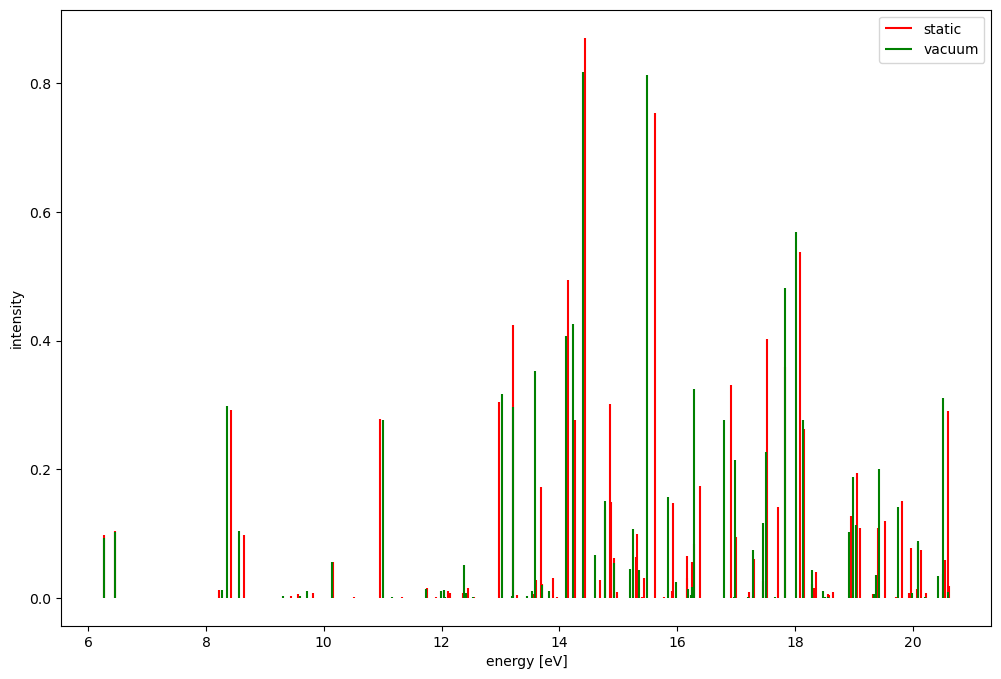

In [25]:
plt.vlines(spectrum_static[0],0,spectrum_static[1],label="static",color='r')
plt.vlines(spectrum_vacuum[0],0,spectrum_vacuum[1],label="vacuum",color='g')
plt.xlabel("energy [eV]")
plt.ylabel("intensity")
plt.legend()
plt.show()